**Part-1**

In [ ]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

!unzip \*.zip

Missing Value Ratio 

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes (5).csv


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
diabetes = pd.read_csv('diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
#We know that below features can not be zero(e.g. a person’s blood pressure can not be 0) hence we are imputing zeros with nan value in these features.
diabetes['Glucose'].replace(0,np.nan,inplace=True)
diabetes['BloodPressure'].replace(0,np.nan,inplace=True)
diabetes['SkinThickness'].replace(0,np.nan,inplace=True)
diabetes['Insulin'].replace(0,np.nan,inplace=True)
diabetes['BMI'].replace(0,np.nan,inplace=True)

In [ ]:
diabetes.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [ ]:
# let’s see for each feature what is the percentage of having missing values.
diabetes['Glucose'].isnull().sum()/len(diabetes)*100

0.6510416666666667

In [ ]:
diabetes['BloodPressure'].isnull().sum()/len(diabetes)*100

4.557291666666666

In [ ]:
diabetes['SkinThickness'].isnull().sum()/len(diabetes)*100

29.557291666666668

In [ ]:
diabetes['Insulin'].isnull().sum()/len(diabetes)*100

48.69791666666667

In [ ]:
diabetes['BMI'].isnull().sum()/len(diabetes)*100

1.4322916666666665

In [ ]:
#We can see that a large number of data missing in SkinThickness, Insulin

In [ ]:
diabetes_missing_value_threshold=diabetes.dropna(thresh=int(diabetes.shape[0] * .9) ,axis=1)
diabetes_missing_value_threshold

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,33.6,0.627,50,1
1,1,85.0,66.0,26.6,0.351,31,0
2,8,183.0,64.0,23.3,0.672,32,1
3,1,89.0,66.0,28.1,0.167,21,0
4,0,137.0,40.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...
763,10,101.0,76.0,32.9,0.171,63,0
764,2,122.0,70.0,36.8,0.340,27,0
765,5,121.0,72.0,26.2,0.245,30,0
766,1,126.0,60.0,30.1,0.349,47,1


In [ ]:
#Here we are keeping only those features which are having missing data less than 10%.
diabetes_missing_value_threshold_features = diabetes_missing_value_threshold.drop('Outcome',axis=1)
diabetes_missing_value_threshold_label= diabetes_missing_value_threshold['Outcome']
diabetes_missing_value_threshold_features,diabetes_missing_value_threshold_label

(     Pregnancies  Glucose  BloodPressure   BMI  DiabetesPedigreeFunction  Age
 0              6    148.0           72.0  33.6                     0.627   50
 1              1     85.0           66.0  26.6                     0.351   31
 2              8    183.0           64.0  23.3                     0.672   32
 3              1     89.0           66.0  28.1                     0.167   21
 4              0    137.0           40.0  43.1                     2.288   33
 ..           ...      ...            ...   ...                       ...  ...
 763           10    101.0           76.0  32.9                     0.171   63
 764            2    122.0           70.0  36.8                     0.340   27
 765            5    121.0           72.0  26.2                     0.245   30
 766            1    126.0           60.0  30.1                     0.349   47
 767            1     93.0           70.0  30.4                     0.315   23
 
 [768 rows x 6 columns], 0      1
 1      0
 2    

In [ ]:
X=diabetes_missing_value_threshold_features
Y=diabetes_missing_value_threshold_label

Variance Threshold

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving diabetes_cleaned.csv to diabetes_cleaned (2).csv


In [ ]:
#If the variance is low or close to zero, then a feature is approximately constant and will not improve the performance of the model. In that case, it should be removed.
#Variance will also be very low for a feature if only a handful of observations of that feature differ from a constant value.
diabetes = pd.read_csv('diabetes_cleaned.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,218.937760,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,70.189298,26.6,0.351,31.0,0
2,8.0,183.0,64.0,29.0,269.968908,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.000000,28.1,0.167,21.0,0
4,0.0,137.0,40.0,35.0,168.000000,43.1,2.288,33.0,1


In [ ]:
X=diabetes.drop('Outcome',axis=1)
Y=diabetes['Outcome']

In [ ]:
X.var(axis=0)

Pregnancies                   11.354056
Glucose                      929.680350
BloodPressure                146.321591
SkinThickness                 77.285567
Insulin                     9484.259268
BMI                           48.813618
DiabetesPedigreeFunction       0.109779
Age                          138.303046
dtype: float64

In [ ]:
#We can see that DiabetesPedigreeFunction variance is less so it brings little information because it is (almost) constant , this can be a justification to remove DiabetesPedigreeFunction column but before considering this we should scale these features because they are of different scales.

In [ ]:
from sklearn.preprocessing import minmax_scale
X_scaled_df =pd.DataFrame(minmax_scale(X,feature_range=(0,10)),columns=X.columns)

In [ ]:
#We have used sklearn minmax scaler here.
X_scaled_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,3.529412,6.709677,4.897959,3.043478,2.740295,3.149284,2.344150,4.833333
1,0.588235,2.645161,4.285714,2.391304,1.018185,1.717791,1.165670,1.666667
2,4.705882,8.967742,4.081633,2.391304,3.331099,1.042945,2.536294,1.833333
3,0.588235,2.903226,4.285714,1.739130,1.293850,2.024540,0.380017,0.000000
4,0.000000,6.000000,1.632653,3.043478,2.150572,5.092025,9.436379,2.000000
...,...,...,...,...,...,...,...,...
763,5.882353,3.677419,5.306122,4.456522,2.289500,3.006135,0.397096,7.000000
764,1.176471,5.032258,4.693878,2.173913,2.044244,3.803681,1.118702,1.000000
765,2.941176,4.967742,4.897959,1.739130,1.502241,1.635992,0.713066,1.500000
766,0.588235,5.290323,3.673469,2.391304,2.217956,2.433538,1.157131,4.333333


In [ ]:
X_scaled_df.var()

Pregnancies                 3.928739
Glucose                     3.869637
BloodPressure               1.523548
SkinThickness               0.913109
Insulin                     1.271218
BMI                         2.041377
DiabetesPedigreeFunction    2.001447
Age                         3.841751
dtype: float64

In [ ]:
from sklearn.feature_selection import VarianceThreshold
select_features = VarianceThreshold(threshold=1.0)

In [ ]:
X_variance_threshold_df=select_features.fit_transform(X_scaled_df)
X_variance_threshold_df

array([[3.52941176, 6.70967742, 4.89795918, ..., 3.14928425, 2.3441503 ,
        4.83333333],
       [0.58823529, 2.64516129, 4.28571429, ..., 1.71779141, 1.16567037,
        1.66666667],
       [4.70588235, 8.96774194, 4.08163265, ..., 1.04294479, 2.53629377,
        1.83333333],
       ...,
       [2.94117647, 4.96774194, 4.89795918, ..., 1.63599182, 0.71306576,
        1.5       ],
       [0.58823529, 5.29032258, 3.67346939, ..., 2.43353783, 1.15713066,
        4.33333333],
       [0.58823529, 3.16129032, 4.69387755, ..., 2.49488753, 1.01195559,
        0.33333333]])

In [ ]:
X_variance_threshold_df=pd.DataFrame(X_variance_threshold_df)

In [ ]:
X_variance_threshold_df.head()

,0,1,2,3,4,5,6
0,3.529412,6.709677,4.897959,2.740295,3.149284,2.344150,4.833333
1,0.588235,2.645161,4.285714,1.018185,1.717791,1.165670,1.666667
2,4.705882,8.967742,4.081633,3.331099,1.042945,2.536294,1.833333
3,0.588235,2.903226,4.285714,1.293850,2.024540,0.380017,0.000000
4,0.000000,6.000000,1.632653,2.150572,5.092025,9.436379,2.000000


In [ ]:
def get_selected_features(raw_df,processed_df):
    selected_features=[]
    for i in range(len(processed_df.columns)):
        for j in range(len(raw_df.columns)):
            if (processed_df.iloc[:,i].equals(raw_df.iloc[:,j])):
                selected_features.append(raw_df.columns[j])
    return selected_features

In [ ]:
selected_features= get_selected_features(X_scaled_df,X_variance_threshold_df)
selected_features

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [ ]:
#We can see SkinThickness feature is not selected as its variance is less.
X_variance_threshold_df.columns=selected_features
selected_features_df = X_variance_threshold_df
selected_features_df

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age
0,3.529412,6.709677,4.897959,2.740295,3.149284,2.344150,4.833333
1,0.588235,2.645161,4.285714,1.018185,1.717791,1.165670,1.666667
2,4.705882,8.967742,4.081633,3.331099,1.042945,2.536294,1.833333
3,0.588235,2.903226,4.285714,1.293850,2.024540,0.380017,0.000000
4,0.000000,6.000000,1.632653,2.150572,5.092025,9.436379,2.000000
...,...,...,...,...,...,...,...
763,5.882353,3.677419,5.306122,2.289500,3.006135,0.397096,7.000000
764,1.176471,5.032258,4.693878,2.044244,3.803681,1.118702,1.000000
765,2.941176,4.967742,4.897959,1.502241,1.635992,0.713066,1.500000
766,0.588235,5.290323,3.673469,2.217956,2.433538,1.157131,4.333333


In [ ]:
#Here we are keeping only those features which are having missing data less than 10%.
def generate_feature_scores_df(X,Score):
    feature_score=pd.DataFrame()
    for i in range(X.shape[1]):
        new =pd.DataFrame({"Features":X.columns[i],"Score":Score[i]},index=[i])
        feature_score=pd.concat([feature_score,new])
    return feature_score

Chi-Square Test

In [ ]:
#Chi2 is a measure of dependency between two variables. It gives us a goodness of fit measure because it measures how well an observed distribution of a particular feature fits with the distribution that is expected if two features are independent.
#Scikit-Learn offers a feature selection estimator named SelectKBest which select K numbers of features based on the statistical analysis.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes (4).csv


In [ ]:
diabetes=pd.read_csv('diabetes.csv')

In [ ]:
X=diabetes.drop('Outcome',axis=1)
Y=diabetes['Outcome']

In [ ]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

In [ ]:
X=X.astype(np.float64)

In [ ]:
chi2_test=SelectKBest(score_func=chi2,k=4)
chi2_model=chi2_test.fit(X,Y)

In [ ]:
chi2_model.scores_

array([ 111.51969064, 1411.88704064,   17.60537322,   53.10803984,
       2175.56527292,  127.66934333,    5.39268155,  181.30368904])

In [ ]:
feature_score_df=generate_feature_scores_df(X,chi2_model.scores_)
feature_score_df

,Features,Score
0,Pregnancies,111.519691
1,Glucose,1411.887041
2,BloodPressure,17.605373
3,SkinThickness,53.108040
4,Insulin,2175.565273
5,BMI,127.669343
6,DiabetesPedigreeFunction,5.392682
7,Age,181.303689


In [ ]:
#Here we can see the features and corresponding chi square scores.
X_new=chi2_model.transform(X)

In [ ]:
X_new=pd.DataFrame(X_new)

In [ ]:
selected_features=get_selected_features(X,X_new)
selected_features

['Glucose', 'Insulin', 'BMI', 'Age']

In [ ]:
chi2_best_features=X[selected_features]
chi2_best_features.head()

,Glucose,Insulin,BMI,Age
0,148.0,0.0,33.6,50.0
1,85.0,0.0,26.6,31.0
2,183.0,0.0,23.3,32.0
3,89.0,94.0,28.1,21.0
4,137.0,168.0,43.1,33.0


Anova F-Test

In [ ]:
#The F-value scores examine the varaiance by grouping the numerical feature by the target vector, the means for each group are significantly different.

In [ ]:
from sklearn.feature_selection import f_classif,SelectPercentile
Anova_test=SelectPercentile(f_classif,percentile=80)
Anova_model= Anova_test.fit(X,Y)

In [ ]:
#we will be selecting only 80% out of all the features based on the F-Score.
Anova_model.scores_

array([ 39.67022739, 213.16175218,   3.2569504 ,   4.30438091,
        13.28110753,  71.7720721 ,  23.8713002 ,  46.14061124])

In [ ]:
feature_scores_df=generate_feature_scores_df(X,Anova_model.scores_)
feature_scores_df

,Features,Score
0,Pregnancies,39.670227
1,Glucose,213.161752
2,BloodPressure,3.256950
3,SkinThickness,4.304381
4,Insulin,13.281108
5,BMI,71.772072
6,DiabetesPedigreeFunction,23.871300
7,Age,46.140611


In [ ]:
X_new=Anova_model.transform(X)

In [ ]:
X_new=pd.DataFrame(X_new)

In [ ]:
selected_features=get_selected_features(X,X_new)
selected_features

['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

In [ ]:
Anova_selected_feature_df=X[selected_features]
Anova_selected_feature_df.head()

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,0.0,33.6,0.627,50.0
1,1.0,85.0,0.0,26.6,0.351,31.0
2,8.0,183.0,0.0,23.3,0.672,32.0
3,1.0,89.0,94.0,28.1,0.167,21.0
4,0.0,137.0,168.0,43.1,2.288,33.0


In [ ]:
#Now let’s compare predictions of these approaches
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
def buildmodel(X,Y,test_frac,model_name=''):
    x_train,x_test,y_train,y_test =train_test_split(X,Y,test_size=test_frac)
    model =LogisticRegression(solver='liblinear').fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print('Accuracy of the '+model_name+' based model is ',str(accuracy_score(y_test,y_pred)))

In [ ]:
buildmodel(X=selected_features_df,Y=Y,test_frac=.2,model_name="Variance threshold")

Accuracy of the Variance threshold based model is  0.6883116883116883


In [ ]:
buildmodel(X=diabetes_missing_value_threshold_features,Y=diabetes_missing_value_threshold_label,test_frac=.2,model_name="Missing values threshold")

In [ ]:
buildmodel(X=X,Y=Y,test_frac=.2,model_name="General Logistic Regression")

Accuracy of the General Logistic Regression based model is  0.7532467532467533


In [ ]:
buildmodel(X=chi2_best_features,Y=Y,test_frac=.2,model_name="Chi2 based")

Accuracy of the Chi2 based based model is  0.8051948051948052


In [ ]:
buildmodel(X=Anova_selected_feature_df,Y=Y,test_frac=.2,model_name="Anova F-test based")
#We can definitely see that accuracy has been improved by taking these feature selection approaches.

Accuracy of the Anova F-test based based model is  0.7207792207792207


**Part-2**

**Removing Constant features**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle (2).json


In [ ]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "kaggle.json" with length 69 bytes


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [ ]:
!kaggle competitions download -c santander-customer-satisfaction

  0% 0.00/4.05M [00:00<?, ?B/s]
100% 4.05M/4.05M [00:00<00:00, 37.1MB/s]
  0% 0.00/4.02M [00:00<?, ?B/s]
100% 4.02M/4.02M [00:00<00:00, 134MB/s]
  0% 0.00/612k [00:00<?, ?B/s]
100% 612k/612k [00:00<00:00, 195MB/s]


In [ ]:
!unzip \*.zip

Archive:  train.csv.zip
  inflating: train.csv               

Archive:  test.csv.zip
  inflating: test.csv                

2 archives were successfully processed.


In [ ]:
#Importing Required Libraries and Dataset
#Constant features have values with zero variance since all the values are the same. We can find the constant columns using the VarianceThreshold function of Python's Scikit Learn Library. 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold

santandar_data = pd.read_csv(r"train.csv", nrows=40000)
santandar_data.shape
#I filtered the top 40 thousand records. In the output, you should see (40000, 371) which means that we have 40 thousand rows and 371 columns in our dataset.

(40000, 371)

In [ ]:
#Splitting Data Into Training and Test Sets
#It is important to mention here that, in order to avoid overfitting, feature selection should only be applied to the training set. Let's divide our data into training and test sets.
train_features, test_features, train_labels, test_labels=train_test_split(
    santandar_data.drop(labels=['TARGET'], axis=1),
    santandar_data['TARGET'],
    test_size=0.2,
    random_state=41)

Removing Constant Features using Variance Threshold

In [ ]:
#we will use VarianceThreshold function that we imported earlier. The function requires a value for its threshold parameter.
#Passing a value of zero for the parameter will filter all the features with zero variance.
constant_filter = VarianceThreshold(threshold=0)

In [ ]:
#we need to simply apply this filter to our training set 
constant_filter.fit(train_features)

VarianceThreshold(threshold=0)

In [ ]:
#Now to get all the features that are not constant, we can use the get_support() method of the filter that we created
len(train_features.columns[constant_filter.get_support()])
#In the output, you should see 320, which means that out of 370 features in the training set 320 features are not constant.

320

In [ ]:
#you can find the number of constant features
constant_columns = [column for column in train_features.columns
                    if column not in train_features.columns[constant_filter.get_support()]]

print(len(constant_columns))

50


In [ ]:
for column in constant_columns:
    print(column)

ind_var2_0
ind_var2
ind_var18_0
ind_var18
ind_var27_0
ind_var28_0
ind_var28
ind_var27
ind_var34_0
ind_var34
ind_var41
ind_var46_0
ind_var46
num_var18_0
num_var18
num_var27_0
num_var28_0
num_var28
num_var27
num_var34_0
num_var34
num_var41
num_var46_0
num_var46
saldo_var18
saldo_var28
saldo_var27
saldo_var34
saldo_var41
saldo_var46
delta_imp_amort_var18_1y3
delta_imp_amort_var34_1y3
imp_amort_var18_hace3
imp_amort_var18_ult1
imp_amort_var34_hace3
imp_amort_var34_ult1
imp_reemb_var13_hace3
imp_reemb_var17_hace3
imp_reemb_var33_hace3
imp_trasp_var17_out_hace3
imp_trasp_var33_out_hace3
num_var2_0_ult1
num_var2_ult1
num_reemb_var13_hace3
num_reemb_var17_hace3
num_reemb_var33_hace3
num_trasp_var17_out_hace3
num_trasp_var33_out_hace3
saldo_var2_ult1
saldo_medio_var13_medio_hace3


In [ ]:
#Finally, to remove constant features from training and test sets, we can use the transform() method of the constant_filter
train_features = constant_filter.transform(train_features)
test_features = constant_filter.transform(test_features)
train_features.shape, test_features.shape
#you will see that both our training and test sets will now contain 320 columns, since the 50 constant columns have been removed.

((32000, 320), (8000, 320))

Removing Quasi-Constant features

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold

santandar_data = pd.read_csv(r"train.csv", nrows=40000)
santandar_data.shape

(40000, 371)

In [ ]:
#Splitting Data Into Training and Test Sets
train_features, test_features, train_labels, test_labels = train_test_split(
    santandar_data.drop(labels=['TARGET'], axis=1),
    santandar_data['TARGET'],
    test_size=0.2,
    random_state=41)

In [ ]:
#Removing Constant Features using Variance Threshold
#Before we can remove quasi-constant features, we should first remove the constant features.
constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit(train_features)

len(train_features.columns[constant_filter.get_support()])

constant_columns = [column for column in train_features.columns
                    if column not in train_features.columns[constant_filter.get_support()]]

train_features.drop(labels=constant_columns, axis=1, inplace=True)
test_features.drop(labels=constant_columns, axis=1, inplace=True)

In [ ]:
#Removing Quasi-Constant Features Using Variance Threshold
qconstant_filter = VarianceThreshold(threshold=0.01)

In [ ]:
#The rest of the steps are the same. We need to apply the filter to our training set using fit() method
qconstant_filter.fit(train_features)

VarianceThreshold(threshold=0.01)

In [ ]:
#Let's check the number of our non-quasi-constant columns.
len(train_features.columns[qconstant_filter.get_support()])
# output, you should see 265 which means that out of 320 columns that we achieved after removing constant features, 55 are quasi-constant.

265

In [ ]:
#To verify the number of quasi-constant columns
qconstant_columns = [column for column in train_features.columns
                    if column not in train_features.columns[qconstant_filter.get_support()]]

print(len(qconstant_columns))
#You should see 55 in the output

55


In [ ]:
#print the names of all the quasi-constant columns
for column in qconstant_columns:
    print(column)

ind_var1
ind_var6_0
ind_var6
ind_var13_largo
ind_var13_medio_0
ind_var13_medio
ind_var14
ind_var17_0
ind_var17
ind_var19
ind_var20_0
ind_var20
ind_var29_0
ind_var29
ind_var30_0
ind_var31_0
ind_var31
ind_var32_cte
ind_var32_0
ind_var32
ind_var33_0
ind_var33
ind_var40
ind_var39
ind_var44_0
ind_var44
num_var6_0
num_var6
num_var13_medio_0
num_var13_medio
num_op_var40_hace3
num_var29_0
num_var29
delta_imp_aport_var33_1y3
delta_num_aport_var33_1y3
ind_var7_emit_ult1
ind_var7_recib_ult1
num_aport_var33_hace3
num_aport_var33_ult1
num_var7_emit_ult1
num_meses_var13_medio_ult3
num_meses_var17_ult3
num_meses_var29_ult3
num_meses_var33_ult3
num_meses_var44_ult3
num_reemb_var13_ult1
num_reemb_var17_ult1
num_reemb_var33_ult1
num_trasp_var17_in_hace3
num_trasp_var17_in_ult1
num_trasp_var17_out_ult1
num_trasp_var33_in_hace3
num_trasp_var33_in_ult1
num_trasp_var33_out_ult1
num_venta_var44_hace3


In [ ]:
#Finally, to see if our training and test sets only contains the non-constant and non-quasi-constant columns, we can use the transform() method of the qconstant_filter
train_features = qconstant_filter.transform(train_features)
test_features = qconstant_filter.transform(test_features)

train_features.shape, test_features.shape
#you will see that both our training and test sets will now contain 265 columns, since the 50 constant, and 55 quasi-constant columns have been removed from a total of default 370 columns.

((32000, 265), (8000, 265))

Removing Duplicate Features

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold

santandar_data = pd.read_csv(r"train.csv", nrows=20000)
santandar_data.shape

(20000, 371)

In [ ]:
#Removing duplicate columns can be computationally costly since we have to take the transpose of the data matrix before we can remove duplicate features. Therefore, in the above script, we only import the first 20 thousand records from the santandar customer satisfaction data

In [ ]:
#Splitting Data Into Training and Test Sets
train_features, test_features, train_labels, test_labels = train_test_split(
    santandar_data.drop(labels=['TARGET'], axis=1),
    santandar_data['TARGET'],
    test_size=0.2,
    random_state=41)

In [ ]:
train_features_T = train_features.T
train_features_T.shape

(370, 16000)

In [ ]:
# we take the transpose of our training data and store it in the train_features_T dataframe. Our initial training set contains 16000 rows and 370 columns, if you take a look at the shape of the transposed training set, you will see that it contains 370 rows and 16000 columns.

In [ ]:
#pandas we have duplicated() method which can help us find duplicate rows from the dataframe. Remember, the rows of the transposed dataframe are actually the columns or the features of the actual dataframe.

In [ ]:
#find the total number of duplicate features in our dataset using the sum() method, chained with the duplicated() method
print(train_features_T.duplicated().sum())

94


In [ ]:
#we can drop the duplicate rows using the drop_duplicates() method. If you pass the string value first to the keep parameter of the drop_duplicates() method, all the duplicate rows will be dropped except the first copy.
#In the next step we will remove all the duplicate rows and will take transpose of the transposed training set to get the original training set that doesn't contain any duplicate column
unique_features = train_features_T.drop_duplicates(keep='first').T

In [ ]:
#print the shape of our new training set without duplicate features
unique_features.shape
#output, you should see (16000,276), you can see that after removing 94 duplicate columns, the size of our feature set has significantly reduced.

(16000, 276)

In [ ]:
duplicated_features = [dup_col for dup_col in train_features.columns if dup_col not in unique_features.columns]
duplicated_features

['ind_var2',
 'ind_var13_medio',
 'ind_var18_0',
 'ind_var18',
 'ind_var26',
 'ind_var25',
 'ind_var27_0',
 'ind_var28_0',
 'ind_var28',
 'ind_var27',
 'ind_var29_0',
 'ind_var29',
 'ind_var32',
 'ind_var34_0',
 'ind_var34',
 'ind_var37',
 'ind_var40_0',
 'ind_var40',
 'ind_var41',
 'ind_var39',
 'ind_var46_0',
 'ind_var46',
 'num_var13_medio',
 'num_var18_0',
 'num_var18',
 'num_var26',
 'num_var25',
 'num_op_var40_hace3',
 'num_op_var39_hace3',
 'num_var27_0',
 'num_var28_0',
 'num_var28',
 'num_var27',
 'num_var29_0',
 'num_var29',
 'num_var32',
 'num_var34_0',
 'num_var34',
 'num_var37',
 'num_var40_0',
 'num_var40',
 'num_var41',
 'num_var39',
 'num_var46_0',
 'num_var46',
 'saldo_var18',
 'saldo_var28',
 'saldo_var27',
 'saldo_var29',
 'saldo_var34',
 'saldo_var40',
 'saldo_var41',
 'saldo_var46',
 'delta_imp_amort_var18_1y3',
 'delta_imp_amort_var34_1y3',
 'delta_imp_reemb_var33_1y3',
 'delta_imp_trasp_var17_out_1y3',
 'delta_imp_trasp_var33_out_1y3',
 'delta_num_reemb_var13_1y3

Removing Correlated Features

In [ ]:
!kaggle competitions download -c bnp-paribas-cardif-claims-management

sample_submission.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
train.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
test.csv.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip \*.zip

Archive:  train.csv.zip
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n

Archive:  test.csv.zip
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n

Archive:  sample_submission.csv.zip
replace sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n

3 archives were successfully processed.


In [ ]:
#Importing Required Libraries and Dataset
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold

paribas_data = pd.read_csv(r"train.csv", nrows=20000)
paribas_data.shape
# output, you should see (20000, 133) which means that our dataset contains 20 thousand rows and 133 features.

(20000, 371)

In [ ]:
paribas_data.columns

Index(['ID', 'var3', 'var15', 'imp_ent_var16_ult1', 'imp_op_var39_comer_ult1',
       'imp_op_var39_comer_ult3', 'imp_op_var40_comer_ult1',
       'imp_op_var40_comer_ult3', 'imp_op_var40_efect_ult1',
       'imp_op_var40_efect_ult3',
       ...
       'saldo_medio_var33_hace2', 'saldo_medio_var33_hace3',
       'saldo_medio_var33_ult1', 'saldo_medio_var33_ult3',
       'saldo_medio_var44_hace2', 'saldo_medio_var44_hace3',
       'saldo_medio_var44_ult1', 'saldo_medio_var44_ult3', 'var38', 'TARGET'],
      dtype='object', length=371)

In [ ]:
paribas_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Columns: 371 entries, ID to TARGET
dtypes: float64(98), int64(273)
memory usage: 56.6 MB


In [ ]:
#Data Preprocessing
#Remove non-numeric features from the dataset
num_colums = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']# we define a list that contains the data types of the columns that we want to retain in our dataset. 
numerical_columns = list(paribas_data.select_dtypes(include=num_colums).columns)#we call the select_dtypes() method on our dataset and pass it the num_colums list that contains the type of columns that we want to retain
#The select_dtypes() method will return the names of the specified numeric columns, which we store in the list numeric_columns
#we filter our columns from paribas_data dataframe with the help of the numerical_colums list. 

paribas_data = paribas_data[numerical_columns]

In [ ]:
paribas_data = paribas_data[numerical_columns]
paribas_data.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,...,saldo_medio_var5_ult1,saldo_medio_var5_ult3,saldo_medio_var8_hace2,saldo_medio_var8_hace3,saldo_medio_var8_ult1,saldo_medio_var8_ult3,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var12_ult1,saldo_medio_var12_ult3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_corto_ult1,saldo_medio_var13_corto_ult3,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var13_largo_ult1,saldo_medio_var13_largo_ult3,saldo_medio_var13_medio_hace2,saldo_medio_var13_medio_hace3,saldo_medio_var13_medio_ult1,saldo_medio_var13_medio_ult3,saldo_medio_var17_hace2,saldo_medio_var17_hace3,saldo_medio_var17_ult1,saldo_medio_var17_ult3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var29_ult1,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,300.0,122.22,300.0,240.75,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3.00,2.07,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0,0,0.0,195.0,195.0,0.0,0.0,195.0,0.0,0.0,195.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,91.56,138.84,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,...,40501.08,13501.47,0.0,0.0,0.0,0.0,0.0,0.0,85501.89,85501.89,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [ ]:
##print the shape of the paribas_data dataframe to see how many numeric columns do we have, execute the following script:
paribas_data.shape

(20000, 371)

In [ ]:
#Splitting Data Into Training and Test Sets
#we need to split our data into training and testing set before removing any correlated features, execute the following script to divide the data into training and test sets
train_features, test_features, train_labels, test_labels = train_test_split(
    paribas_data.drop(labels=['target', 'ID'], axis=1),
    paribas_data['target'],
    test_size=0.2,
    random_state=41)

In [ ]:
#Removing Correlated Features using corr() Method
#To remove the correlated features, we can make use of the corr() method of the pandas dataframe. 
#The corr() method returns a correlation matrix containing correlation between all the columns of the dataframe
#We can then loop through the correlation matrix and see if the correlation between two columns is greater than threshold correlation, add that column to the set of correlated columns.
# first create correlation matrix for the columns in the dataset and an empty set that will contain all the correlated features
correlated_features = set()
correlation_matrix = paribas_data.corr()
#we create correlation matrix correlation_matrix for all the columns in our dataset. 
#We also created a set correlated_features which will contain names of all the correlated features.

In [ ]:
#we will loop through all the columns in the correlation_matrix and will add the columns with a correlation value of 0.8 to the correlated_features set as shown below. You can set any threshold value for the correlation.
for i in range(len(correlation_matrix .columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

In [ ]:
#Let's see the total number of columns in our dataset, with correlation value of greater than 0.8 with at least 1 other column. Execute the following script
len(correlated_features)

In [ ]:
#You should see 55 in the output, which is almost 40% of the original features in the dataset. You can see how much redundant information does our dataset contain. Execute the following script to see the names of these features:
print(correlated_features)

In [ ]:
#The following script removes these columns from the dataset:

train_features.drop(labels=correlated_features, axis=1, inplace=True)
test_features.drop(labels=correlated_features, axis=1, inplace=True)

**Part-3**

Pearson’s Correlation

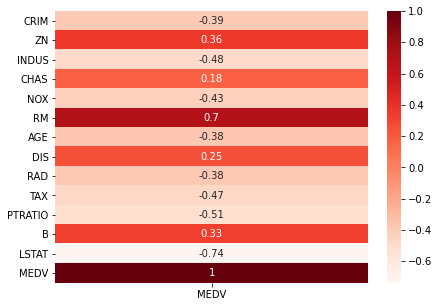

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston
X, y = load_boston(return_X_y=True)
feature_names = load_boston().feature_names
data = pd.DataFrame(X, columns=feature_names)
data['MEDV'] = y
# compute pearson's r
target_correlation = data.corr()[['MEDV']]
# we only care about the target variable
plt.figure(figsize=(7,5))
sns.heatmap(target_correlation, annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
# extract the most correlated features with the output variable
target_correlation[abs(target_correlation)>0.5].dropna()

,MEDV
RM,0.695360
PTRATIO,-0.507787
LSTAT,-0.737663
MEDV,1.000000


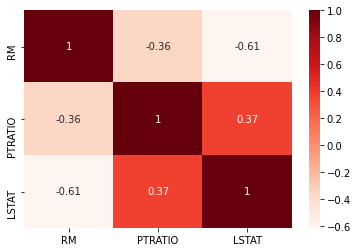

In [ ]:
#Correlation coefficients whose magnitude are between 0.5 and 0.7 indicate variables which can be considered moderately correlated, thus we set the threshold value to 0.5.
#From the 13 features, there are only 3 that strongly correlate with the target
#we must calculate the pearson’s r between those top 3 features.
sns.heatmap(data.corr().loc[['RM', 'PTRATIO', 'LSTAT'], ['RM', 'PTRATIO', 'LSTAT']], annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
#RM and LSTAT are correlated with each other, thus we choose one of them (dropping ie RM is equivalent to removing redundant features). Since the correlation between LSTAT with target variable MEDV is higher than with RM, we select LSTAT.

LDA

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data (1).csv


In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline
df = pd.read_csv('data.csv').iloc[:,1:-1]
X = df.drop(['diagnosis'], axis=1)
le = LabelEncoder()
y = le.fit_transform(df.diagnosis)
labels = le.classes_
steps = [('lda', LinearDiscriminantAnalysis()), ('m', LogisticRegression(C=10))]
model = Pipeline(steps=steps)
# evaluate model
cv = StratifiedKFold(n_splits=5)
n_scores_lda = cross_val_score(model, X, y, scoring='f1_macro', cv=cv, n_jobs=-1)
model = LogisticRegression(C=10)
n_scores = cross_val_score(model, X, y, scoring='f1_macro', cv=cv, n_jobs=-1)
# report performance
print('f1-score (macro)\n')
print('With LDA: %.2f' % np.mean(n_scores_lda))
print('Without LDA: %.2f' % np.mean(n_scores))

f1-score (macro)

With LDA: 0.97
Without LDA: 0.93


ANOVA

In [ ]:
from sklearn.feature_selection import f_classif, SelectKBest
fs = SelectKBest(score_func=f_classif, k=5)

X_new = fs.fit(X, y)

In [ ]:
#We can fine tune the number of selected features by performing Grid-Search with k-fold Cross Validation
from sklearn.model_selection import StratifiedKFold, GridSearch
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
cv = StratifiedKFold(n_splits=5)
pipeline = Pipeline(steps=[('anova',fs), ('lr', LinearRegression(solver='liblinear'))])
params = {['anova__k']: [i+1 for i in range(X.shape[1])]}
search = GridSearchCV(pipeline, params, scoring='accuracy', n_jobs=-1, cv=cv)
results = search.fit(X, y)
print('Best k: %s' % results.best_params_)

χ²

In [ ]:
!kaggle datasets download -d burak3ergun/loan-data-set

  0% 0.00/7.80k [00:00<?, ?B/s]
100% 7.80k/7.80k [00:00<00:00, 12.0MB/s]


In [ ]:
!unzip \*.zip

Archive:  train.csv.zip
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: train.csv               

Archive:  test.csv.zip
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: test.csv                

Archive:  breast-cancer-wisconsin-data.zip
replace data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n

Archive:  loan-data-set.zip
  inflating: loan_data_set.csv       

Archive:  sample_submission.csv.zip
replace sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: sample_submission.csv   

5 archives were successfully processed.


In [ ]:
from sklearn.feature_selection import chi2, SelectKBest
loan = pd.read_csv('loan_data_set.csv')
loan = loan.drop('Loan_ID', axis=1) # irrelevant feature
#Transform the numerical feature into categorical feature
loan['Loan_Amount_Term'] = loan['Loan_Amount_Term'].astype('object')
loan['Credit_History'] = loan['Credit_History'].astype('object')
#Dropping all the null value
loan.dropna(inplace = True)
#Retrieve all the categorical columns except the target
categorical_columns = loan.select_dtypes(exclude='number').drop('Loan_Status', axis=1).columns
X = loan[categorical_columns].apply(LabelEncoder().fit_transform)
y = LabelEncoder().fit_transform(loan['Loan_Status'])
fs = SelectKBest(score_func=chi2, k=5)
X_kbest = fs.fit_transform(X, y)

Mutual Information (MI)

In [ ]:
from sklearn.feature_selection import mutual_info_regression, mutual_info_classif, SelectKBest
fs = SelectKBest(score_func=mutual_info_classif, k=5) # top 5 features
X_subset = fs.fit_transform(X, y)